<a href="https://colab.research.google.com/github/Shasuf/Machine-Learning/blob/main/US%20market%20index%20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# import libraries
print("\n*** Import Libraries ***")
# hides all warnings
import warnings
warnings.filterwarnings('ignore')
# pandas 
import pandas as pd
# numpy
import numpy as np
# matplotlib 
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)
# sns
import seaborn as sns
print("Done ...")



*** Import Libraries ***
Done ...


In [27]:
# import utils stored in g-drive / My Drive  / Collab Notebooks
print("\n*** Import Utils ***")
import sys
from google.colab import drive
drive.mount('/content/gdrive')
# To add a directory with your code into a list of directories 
# which will be searched for packages
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')
import utils
print("Done ...")

##############################################


*** Import Utils ***
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Done ...


In [28]:
##############################################################
# Read Data 
##############################################################

# read dataset
print("\n*** Read Data ***")
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/data/MarketData.csv")
print("Done ...")


*** Read Data ***
Done ...


In [29]:
##############################################################
# Exploratory Data Analysis
##############################################################

# rows & cols
print("\n*** Rows & Cols ***")
print("Rows",df.shape[0])
print("Cols",df.shape[1])



*** Rows & Cols ***
Rows 5232
Cols 7


In [30]:
# columns
print("\n*** Column Names ***")
print(df.columns)


*** Column Names ***
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [32]:
# info
print("\n*** Structure ***")
print(df.info())


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5232 non-null   object 
 1   Open       5232 non-null   float64
 2   High       5232 non-null   float64
 3   Low        5232 non-null   float64
 4   Close      5232 non-null   float64
 5   Adj Close  5232 non-null   float64
 6   Volume     5232 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 286.2+ KB
None


In [33]:
# data types
print("\n*** Data Types ***")
print(df.dtypes)


*** Data Types ***
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [34]:
# unique values
print("\n*** Unique Values ***")
print(df.apply(lambda x: x.nunique()))


*** Unique Values ***
Date         5232
Open         5130
High         5118
Low          5131
Close        5125
Adj Close    5125
Volume       5091
dtype: int64


In [35]:
# summary
print("\n*** Summary ***")
print(df.describe(include=np.number))
#print(df.describe(include=np.object))


*** Summary ***
              Open         High          Low        Close    Adj Close  \
count  5232.000000  5232.000000  5232.000000  5232.000000  5232.000000   
mean   1634.346903  1643.870727  1623.976516  1634.527020  1634.527020   
std     649.457995   651.384321   647.211263   649.548486   649.548486   
min     679.280029   695.270020   666.789978   676.530029   676.530029   
25%    1161.485016  1169.445007  1151.432464  1161.425019  1161.425019   
50%    1379.804993  1390.145019  1370.369995  1380.025024  1380.025024   
75%    2059.962463  2070.492614  2045.802521  2059.942566  2059.942566   
max    3564.739990  3588.110107  3535.229980  3580.840088  3580.840088   

             Volume  
count  5.232000e+03  
mean   3.164975e+09  
std    1.516307e+09  
min    3.560700e+08  
25%    1.732522e+09  
50%    3.270445e+09  
75%    3.990660e+09  
max    1.145623e+10  


In [36]:

# head
print("\n*** Head ***")
print(df.head())


*** Head ***
         Date         Open         High          Low        Close  \
0  2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971   
1  2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044   
2  2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985   
3  2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951   
4  2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971   

     Adj Close      Volume  
0  1455.219971   931800000  
1  1399.420044  1009000000  
2  1402.109985  1085500000  
3  1403.449951  1092300000  
4  1441.469971  1225200000  


In [37]:
# drop cols
# drop cols which contain identifiers, nominals, descriptions
# change as required
print("\n*** Drop Cols ***")
dfId = df['Date']     # store Id in dfID to recreate dataframe later
df = df.drop('Date', axis=1)
print("Done ...")


*** Drop Cols ***
Done ...


In [38]:
# check outlier count
print('\n*** Outlier Count ***')
print(utils.OutlierCount(df))



*** Outlier Count ***
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       1
dtype: int64


In [39]:

# check outlier values
print('\n*** Outlier Values ***')
print(utils.OutlierValues(df))


*** Outlier Values ***
Open                    []
High                    []
Low                     []
Close                   []
Adj Close               []
Volume       [11456230000]
dtype: object


In [40]:
# # handle outliers if required
print('\n*** Handle Outliers ***')
df = utils.HandleOutliers(df)
print("Done ...")


*** Handle Outliers ***
Done ...


In [41]:
# check zeros
print('\n*** Columns With Zeros ***')
print((df==0).sum())


*** Columns With Zeros ***
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [42]:

# drop col if all values are same
print("\n*** Same Value Cols Drop ***")
lDropCols = utils.SameValuesCols(df)
print(lDropCols)
if lDropCols != []:
    df = df.drop(lDropCols, axis=1)
print("Done ...")


*** Same Value Cols Drop ***
[]
Done ...


In [43]:
# drop col if more than 50% null values
print("\n*** Null Value Cols Drop ***")
lDropCols = utils.NullValuesCols(df)
print(lDropCols)
if lDropCols != []:
    df = df.drop(lDropCols, axis=1)
print("Done ...")



*** Null Value Cols Drop ***
[]
Done ...


In [44]:
# check nulls
print('\n*** Columns With Nulls ***')
print(df.isnull().sum()) 



*** Columns With Nulls ***
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [45]:
# check std dev 
print('\n*** StdDev In Columns ***')
print(df.std())


*** StdDev In Columns ***
Open         6.494580e+02
High         6.513843e+02
Low          6.472113e+02
Close        6.495485e+02
Adj Close    6.495485e+02
Volume       1.515615e+09
dtype: float64



*** Boxplot ***


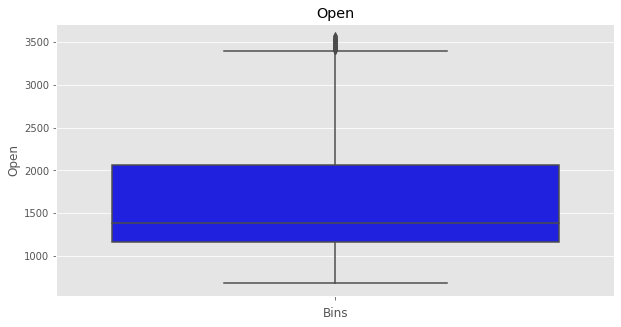

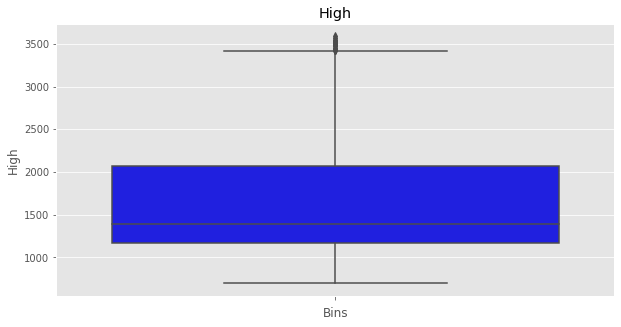

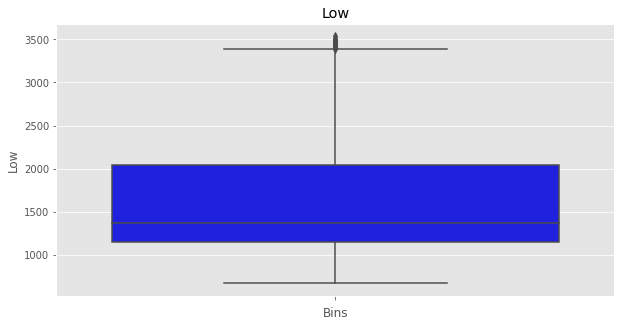

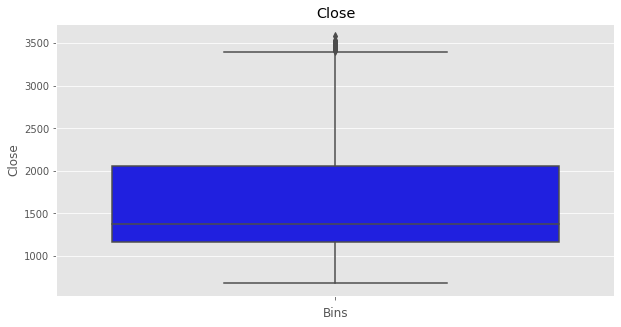

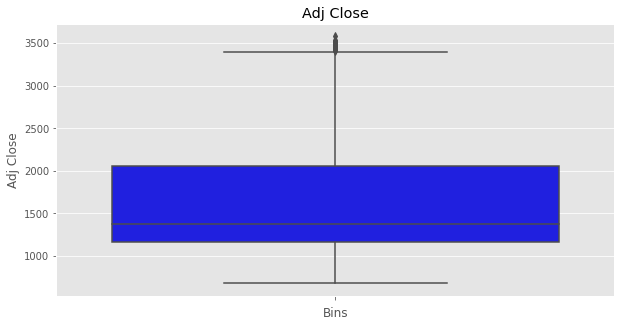

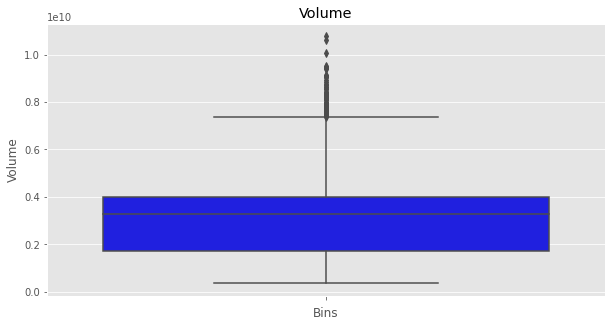

In [46]:
##############################################################
# Visual Data Analysis
##############################################################

# boxplot
print('\n*** Boxplot ***')
colNames = df.columns.tolist()
for colName in colNames:
    plt.figure()
    sns.boxplot(y=df[colName], color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()


*** Histogram Plot ***
Histograms


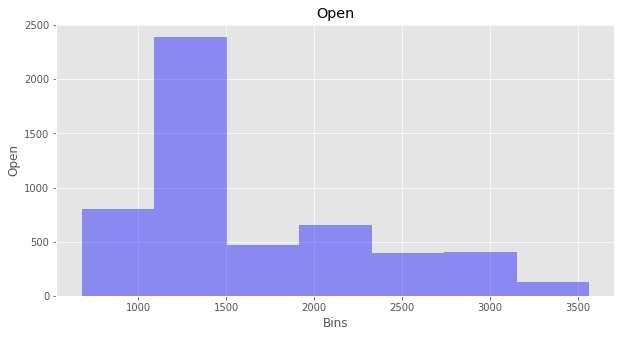

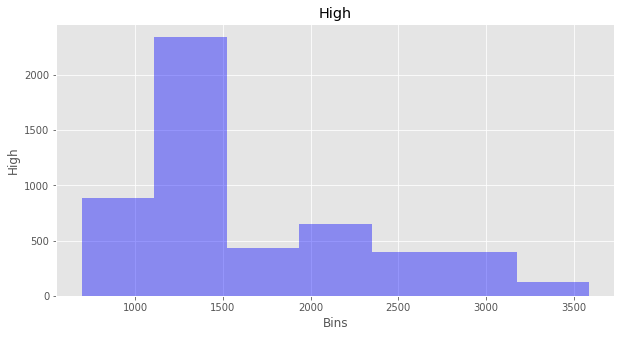

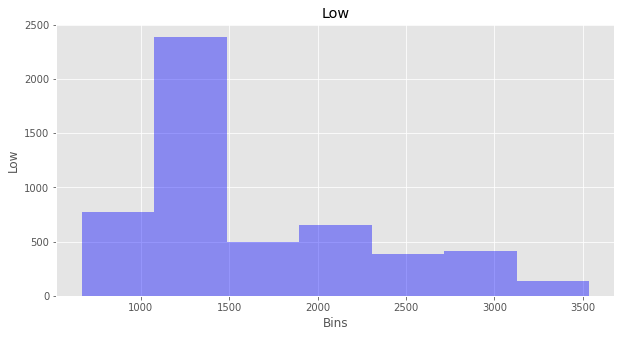

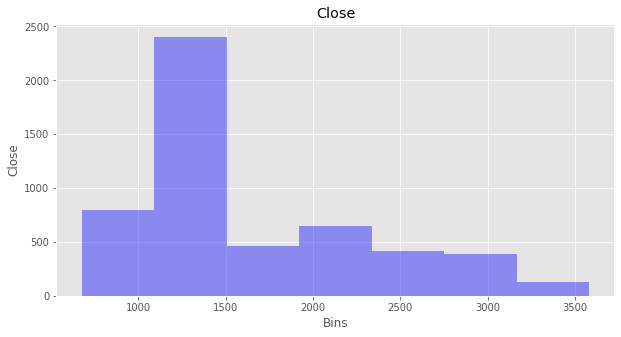

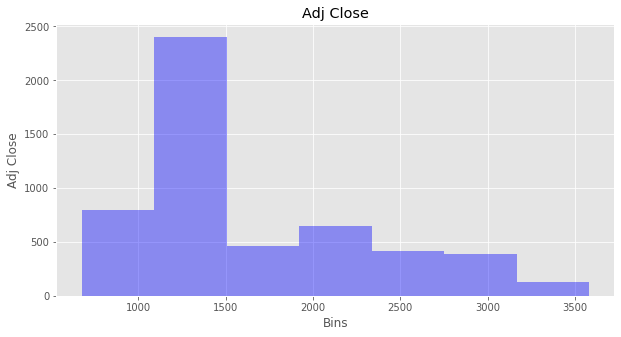

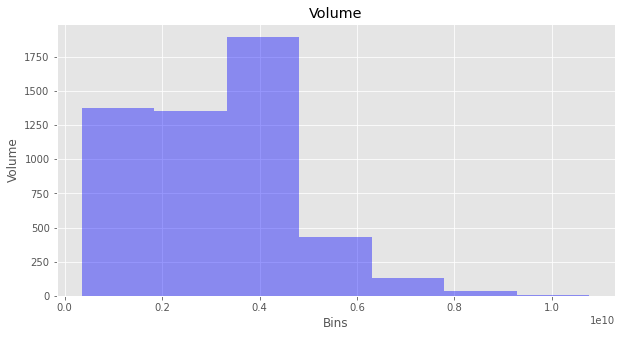

In [47]:
# histograms
print("\n*** Histogram Plot ***")
colNames = df.columns.tolist()
print('Histograms')
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.distplot(colValues, bins=7, kde=False, color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()

In [48]:
# class count plot
# change as required
vMaxCats = 10
colNames = df.columns.tolist()
print("\n*** Distribution Plot ***")
bFlag = False
for colName in colNames:
    if len(df[colName].unique()) > vMaxCats:
        continue
    plt.figure()
    sns.countplot(df[colName],label="Count")
    plt.title(colName)
    plt.show()
    bFlag = True
if bFlag==False:
    print("No Categoric Variables Found")




*** Distribution Plot ***
No Categoric Variables Found


In [49]:

################################
# Prepare Data
################################

# split into data & target
print("\n*** Prepare Data ***")
allCols = df.columns.tolist()
print(allCols)
#allCols.remove(clsVars)
print(allCols)
X = df[allCols].values


*** Prepare Data ***
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [50]:
# shape
print("\n*** Prepare Data - Shape ***")
print(X.shape)
print(type(X))



*** Prepare Data - Shape ***
(5232, 6)
<class 'numpy.ndarray'>


In [51]:
# head
print("\n*** Prepare Data - Head ***")
print(X[0:4])


*** Prepare Data - Head ***
[[1.46925000e+03 1.47800000e+03 1.43835999e+03 1.45521997e+03
  1.45521997e+03 9.31800000e+08]
 [1.45521997e+03 1.45521997e+03 1.39743005e+03 1.39942004e+03
  1.39942004e+03 1.00900000e+09]
 [1.39942004e+03 1.41327002e+03 1.37768005e+03 1.40210999e+03
  1.40210999e+03 1.08550000e+09]
 [1.40210999e+03 1.41190002e+03 1.39209998e+03 1.40344995e+03
  1.40344995e+03 1.09230000e+09]]


In [52]:

################################
# Knn Clustering
###############################

# imports
from sklearn.cluster import KMeans

# how to decide on the clusters
# within cluster sum of squares errors - wcsse
# elbow method ... iterations should be more than 10
print("\n*** Compute WCSSE ***")
vIters = 20
lWcsse = []
for i in range(1, vIters):
    kmcModel = KMeans(n_clusters=i)
    kmcModel.fit(X)
    lWcsse.append(kmcModel.inertia_)
for vWcsse in lWcsse:
    print(vWcsse)


*** Compute WCSSE ***
1.2016065303765972e+22
4.5044047361359856e+21
1.8760092524597587e+21
1.1409505725614435e+21
7.607597167145588e+20
5.4543690246151845e+20
4.09275359253762e+20
3.3139026897911284e+20
2.6570025516460684e+20
2.170520892463276e+20
1.8135754555543015e+20
1.5262745377766746e+20
1.3138024349449562e+20
1.1291872222944002e+20
9.844370708950224e+19
8.789846347871065e+19
7.929169991950556e+19
7.111370524363897e+19
6.3665143668841775e+19



*** Plot WCSSE ***


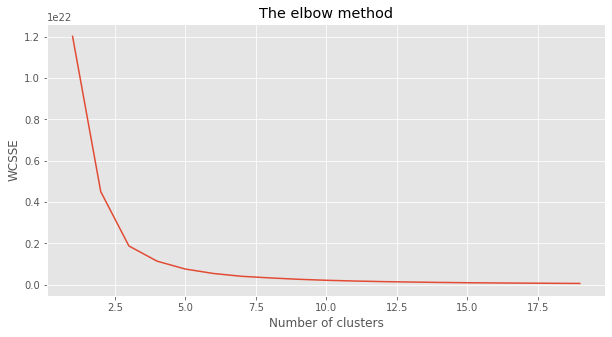

In [53]:

# # plotting the results onto a line graph, allowing us to observe 'The elbow'
print("\n*** Plot WCSSE ***")
plt.figure()
plt.plot(range(1, vIters), lWcsse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSSE') #within cluster sum of squares error
plt.show()

In [55]:
# programatically
!pip install kneed
print("\n*** Find Best K ***")
import kneed
kl = kneed.KneeLocator(range(1, vIters), lWcsse, curve="convex", direction="decreasing")
vBestK = kl.elbow
print(vBestK)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

*** Find Best K ***
4


In [56]:
# k means cluster model
print("\n*** Model Create & Train ***")
model = KMeans(n_clusters=vBestK, random_state=707)
model.fit(X)


*** Model Create & Train ***


KMeans(n_clusters=4, random_state=707)

In [57]:
# result
print("\n*** Model Results ***")
print(model.labels_)
df['PredKnn'] = model.labels_


*** Model Results ***
[0 0 0 ... 1 1 2]


In [58]:
# counts for knn
print("\n*** Counts For Knn ***")
print(df.groupby(df['PredKnn']).size())


*** Counts For Knn ***
PredKnn
0    1653
1    2085
2    1162
3     332
dtype: int64



*** Distribution Plot - KNN ***


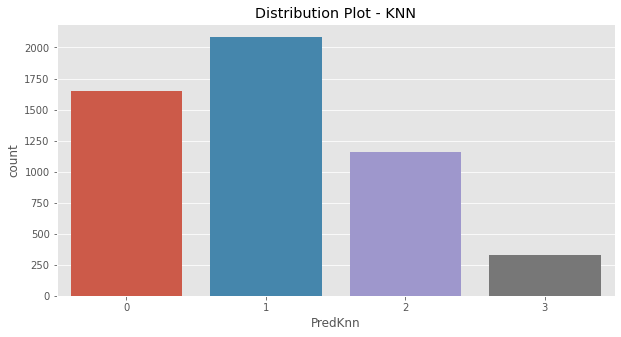

In [59]:
# class count plot
print("\n*** Distribution Plot - KNN ***")
plt.figure()
sns.countplot(data=df, x='PredKnn', label="Count")
plt.title('Distribution Plot - KNN')
plt.show()

In [60]:
################################
# Hierarchical Clustering
###############################

# linkage
print("\n*** Linkage Method ***")
from scipy.cluster import hierarchy as hac
vLinkage = hac.linkage(df, 'ward')
print("Done ...")


*** Linkage Method ***
Done ...



*** Plot Dendrogram ***
Looks Cluttered


<function matplotlib.pyplot.show>

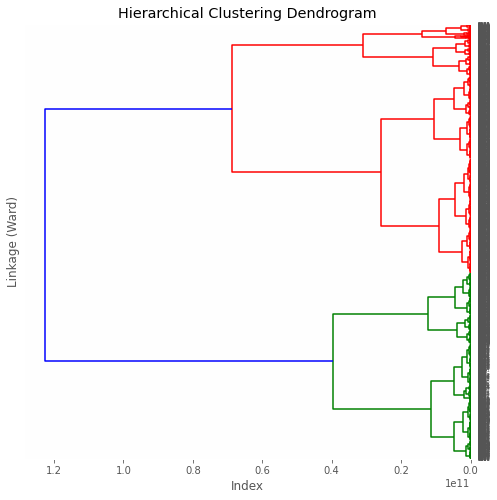

In [61]:
# # make the dendrogram
print("\n*** Plot Dendrogram ***")
print("Looks Cluttered")
plt.figure(figsize=(8,8))
hac.dendrogram(vLinkage, 
orientation='left')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Linkage (Ward)')
plt.show


*** Plot Dendrogram ***
No Groups


<function matplotlib.pyplot.show>

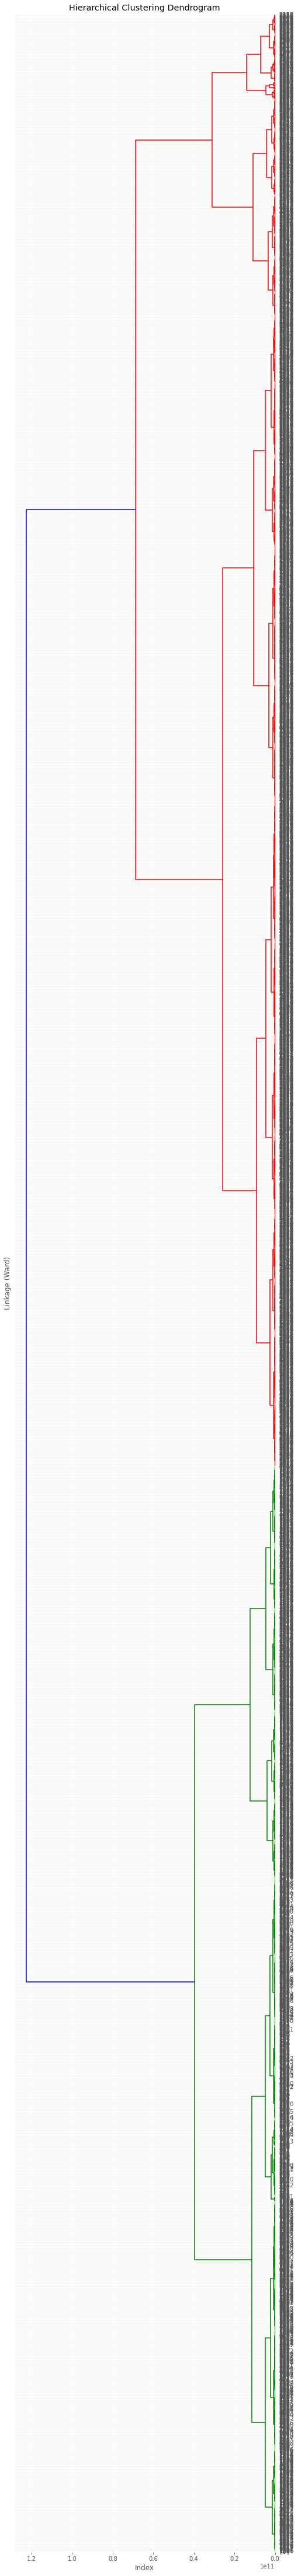

In [62]:
# # make the dendrogram - large so readable
# # make the dendrogram
print("\n*** Plot Dendrogram ***")
print("No Groups")
plt.figure(figsize=(8,80))
hac.dendrogram(vLinkage, 
                leaf_font_size=10.,
                orientation='left')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Linkage (Ward)')
plt.show

In [63]:
# create cluster model
print("\n*** Agglomerative Clustering ***")
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=vBestK, affinity='euclidean', linkage='ward')  


*** Agglomerative Clustering ***


In [64]:
# train and group together
lGroups = model.fit_predict(df)
print(lGroups)

[3 3 3 ... 2 2 2]


In [65]:
# update data frame
df['PredHeir'] = lGroups
print("Done ...")

Done ...


In [66]:
# counts for heir
print("\n*** Counts For Heir ***")
print(df.groupby(df['PredHeir']).size())



*** Counts For Heir ***
PredHeir
0     623
1     849
2    2371
3    1389
dtype: int64



*** Distribution Plot - Heir ***


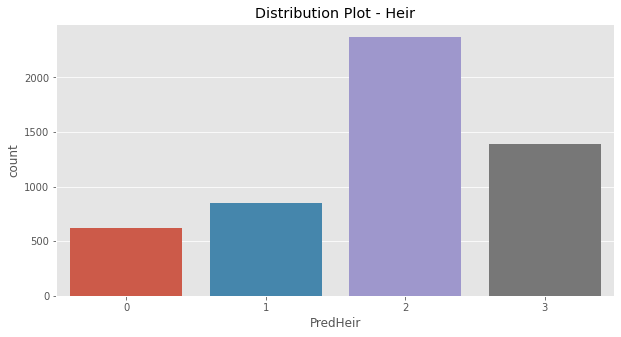

In [67]:
# class count plot
print("\n*** Distribution Plot - Heir ***")
plt.figure(),
sns.countplot(data=df, x='PredHeir', label="Count")
plt.title('Distribution Plot - Heir')
plt.show()

In [68]:
################################
# Compare
###############################

# counts for knn
print("\n*** Counts For Knn ***")
print(df.groupby(df['PredKnn']).size())


*** Counts For Knn ***
PredKnn
0    1653
1    2085
2    1162
3     332
dtype: int64


In [69]:
# counts for heir
print("\n*** Counts For Heir ***")
print(df.groupby(df['PredHeir']).size())



*** Counts For Heir ***
PredHeir
0     623
1     849
2    2371
3    1389
dtype: int64


In [70]:
# interchange as required ...could be different for each group
df['PredHeir'] = df['PredHeir'].map({4:0, 0:1, 3:2, 2:3, 1:4})

In [71]:
# counts for knn
print("\n*** Counts For Knn ***")
print(df.groupby(df['PredKnn']).size())


*** Counts For Knn ***
PredKnn
0    1653
1    2085
2    1162
3     332
dtype: int64


In [72]:
# counts for heir
print("\n*** Counts For Heir ***")
print(df.groupby(df['PredHeir']).size())


*** Counts For Heir ***
PredHeir
1     623
2    1389
3    2371
4     849
dtype: int64


In [74]:
# imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import v_measure_score
# confusion matrix
print("\n*** Confusion Matrix - Actual ***")
cm = confusion_matrix(df['PredKnn'], df['PredKnn'])
print(cm)
print("\n*** Confusion Matrix - Clustered ***")
cm = confusion_matrix(df['PredKnn'], df['PredHeir'])
print(cm)


*** Confusion Matrix - Actual ***
[[1653    0    0    0]
 [   0 2085    0    0]
 [   0    0 1162    0]
 [   0    0    0  332]]

*** Confusion Matrix - Clustered ***
[[   0    0 1389    0  264]
 [   0    0    0 1500  585]
 [   0  291    0  871    0]
 [   0  332    0    0    0]
 [   0    0    0    0    0]]


In [75]:
# accuracy 
print("\n*** Accuracy ***")
ac = accuracy_score(df['PredKnn'], df['PredHeir'])*100
print(ac)


*** Accuracy ***
0.0
